### TP2


### Mohammed Ramzi Bouthiba, Matricule 2065386
### Vithor Bertalan, Matricule 2135362

### First Step - Load the CSVs, and calculate the adjacencies graph using iGraph. Put the CSVs in the same folder as this Notebook. 

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from nltk.corpus import stopwords
from scipy import sparse
import networkx as nx
import pandas as pd
import igraph as ig
import numpy as np
import scipy.io
import time

## Loads matrix and CSVs
m = scipy.io.mmread('tp-matrix.dgt')
articles = pd.read_csv("12-articles.csv", sep=",")
matrix_names = pd.read_csv("tp-matrix-names.csv", sep=" ")

### Q1, Part 1 - Calculate 10 recommendations of each of the articles in the 12-articles subset

In [10]:
# Create a directed graph of type networkx
nx_graph = nx.from_scipy_sparse_matrix(m, create_using=nx.DiGraph)

# Convert the networkx graph to type igraph
g = ig.Graph.from_networkx(nx_graph)

## Calculates PageRank for the graph, using iGraph's standard method
pr = g.pagerank()

'Gets the indexes of the 12-articles set in the overall matrix'
def gets_indexes():
    pos = []
    for i in articles["id"]:
        count = 0
        for j in matrix_names["x"]:
            if (i==j):
                pos.append(count)
            count+=1
    return pos

'Classifies the recommendations of a given index, based on their PageRanks'
'i = index to calculate the recommendations'
def gets_recommendations(i):
    rows, cols = m.tocsr()[i].nonzero()
    ranks = np.empty([0, 2])
    for j in cols:
        ranks = np.vstack([ranks,[j,pr[j]]])
    return ranks[ranks[:, 1].argsort()[::-1]]

'Gets all the recommendations of the 12 articles set'
def gets_articles_recommendations():
    pos = gets_indexes()
    count = 1
    for i in pos:
        recs = gets_recommendations(i)
        ## Adds one to variable i, because index 0 is equivalent to line 1 in the dataset
        print("For paper number {}, number {} in the 12-articles set, the recommendations by PageRank are:".format(i+1,count))
        vector = recs[:,0].astype(int)
        ## Adds one to the recommendations, because index 0 is equivalent to line 1 in the dataset
        print([x+1 for x in vector])
        count+=1      
        
gets_articles_recommendations()

For paper number 15089, number 1 in the 12-articles set, the recommendations by PageRank are:
[6568, 6106, 3266, 3269, 9137, 3263, 3268, 3277, 13231, 16362, 8132, 22252, 18172]
For paper number 35353, number 2 in the 12-articles set, the recommendations by PageRank are:
[2004, 2002, 308, 3187, 6994, 333, 7892, 338, 5907, 282, 10632, 1059, 12769, 12467, 25724, 12764, 24730, 1348]
For paper number 50496, number 3 in the 12-articles set, the recommendations by PageRank are:
[13710, 30836, 21335]
For paper number 50497, number 4 in the 12-articles set, the recommendations by PageRank are:
[97, 281, 107]
For paper number 11636, number 5 in the 12-articles set, the recommendations by PageRank are:
[33, 1642, 1085, 1250, 2271, 2083, 1323, 1368, 4941, 2079, 3192, 4024, 2859, 4159, 6204, 6095]
For paper number 12593, number 6 in the 12-articles set, the recommendations by PageRank are:
[17, 449, 16, 1562, 2040, 6464, 373, 3228, 3503, 4259, 5559, 1874, 4705, 15802, 9063, 5197, 9066, 3043, 3221, 

### Q1, Part 2 - Calculate the MRR for the references of each of the 12 articles.

In [11]:
'Creates ordered set of pageranks - the best pagerank will be first'
def order_ranks():
    ranks = np.empty([0, 2])
    for i in range(len(pr)):
        ranks = np.vstack([ranks,[i,pr[i]]])
    return ranks[ranks[:, 1].argsort()[::-1]]

'Given the ordered set, finds the rank of a given index'
'i = index to find the rank'
'ranks = set of ordered pageranks'
def find_rank_index(i, ranks):
    count = 1
    for j in ranks[:,0]:
        if (i==j):
            return count
        count+=1

'Calculates mean reciprocal rank for each of the connections of a given index'
'i = index to calculate the MRR'
def calculate_mrr(i):
    ## Orders the ranks
    ranks = order_ranks()
    rows, cols = m.tocsr()[i].nonzero()
    rrs = []
    
    ## For each of the references...
    for j in cols:
        ## Gets the rank of that index in the ordered list...
        index = find_rank_index(j,ranks)
        ## Calculates the reciprocal rank (1/rank)
        rrs.append(1/index)
    ## And returns the mean of those values
    return(np.mean(rrs))

'Calculates MRR for each of the 12 articles'
def calculate_mrr_articles():
    mrr_vector = []
    pos = gets_indexes()
    count = 1
    for i in pos:
        mrr = calculate_mrr(i)
        mrr_vector.append(mrr)
        ## Adds one to variable i, because index 0 is equivalent to line 1 in the dataset
        print("For paper number {}, number {} in the 12-articles set, the MRR is {}".format(i+1,count,mrr))
        count+=1
    print("The overall average MRR is {}".format(np.mean(mrr_vector)))

start_time = time.time()
calculate_mrr_articles()
print("The MRR for the 12 papers was calculated in {} seconds".format((time.time() - start_time)))

For paper number 15089, number 1 in the 12-articles set, the MRR is 0.0004574767061335355
For paper number 35353, number 2 in the 12-articles set, the MRR is 0.0005500414273253119
For paper number 50496, number 3 in the 12-articles set, the MRR is 7.527825807316256e-05
For paper number 50497, number 4 in the 12-articles set, the MRR is 0.00036754302748344994
For paper number 11636, number 5 in the 12-articles set, the MRR is 0.0669679208682132
For paper number 12593, number 6 in the 12-articles set, the MRR is 0.0026283797344994145
For paper number 36565, number 7 in the 12-articles set, the MRR is 0.011164408019052923
For paper number 12215, number 8 in the 12-articles set, the MRR is 0.002315070782131751
For paper number 18645, number 9 in the 12-articles set, the MRR is 0.0020926995056850623
For paper number 1594, number 10 in the 12-articles set, the MRR is 0.00202990910701956
For paper number 35304, number 11 in the 12-articles set, the MRR is 0.0017984730865547613
For paper numbe

### Q2 - Calculate Thematic PageRank

In [12]:
from scipy.sparse import csr_matrix

## Loads matrix and CSVs
m = scipy.io.mmread('tp-matrix.dgt')
articles = pd.read_csv("12-articles.csv", sep=",")

#convert coo matrix to csr for fast row manipulation
csr_type_matrix = m.tocsr()

#convert coo matrix to csc for fast column manipulation
t_csc_matrix = m.tocsc().transpose()

#helper function for get_indices
def get_index(id):
    for ind in range(len(matrix_names)):
            search_id = matrix_names.iloc[ind].values[0]
            if search_id == id:
                return ind

#create array that contains the indexes of the 12 articles 
def get_indices(articles):
    indices = []
    for i in range(len(articles)):
        target_id = articles.iloc[i].values[0]
        indices.append(get_index(target_id))
    return indices

#get the references' indices of a given article
def forward(ind):
    return csr_type_matrix[ind].indices

#get the citations' indices of a given article
def backward(ind):
    return t_csc_matrix[ind].indices

#create thematique matrix for a given article index
def get_thematique_matrix(ind):
    row = []
    column = []
    data = []
    #(1)
    references = forward(ind)
    for x in references:
        row.append(ind)
        column.append(x)
        data.append(1)
    #(-1)
    citations = backward(ind)
    for x in citations:
        row.append(x)
        column.append(ind)
        data.append(1)
    #(1, 1) and (1, -1)
    for article in references:
        references2 = forward(article)
        for x in references2:
            row.append(article)
            column.append(x)
            data.append(1)
        citations2 = backward(article)
        for x in citations2:
            row.append(x)
            column.append(article)
            data.append(1)
    #(-1, 1)
    for article in citations:
        references3 = forward(article)
        for x in references3:
            row.append(article)
            column.append(x)
            data.append(1)
    #(1, -1, 1)
    if len(references) > 0:
        for article in citations2:
            references4 = forward(article)
            for x in references4:
                row.append(article)
                column.append(x)
                data.append(1)
    #(-1, 1, 1)
    if len(citations) > 0:
        for article in references3:
            references5 = forward(article)
            for x in references5:
                row.append(article)
                column.append(x)
                data.append(1)
    #convert the three arrays into a single sparse matrix
    result = csr_matrix((data, (row, column)))
    #make the data values all ones
    result.data = np.ones(len(result.data), dtype=int)
    return result

def thematique_mrr(ind):
    thematique_matrix = get_thematique_matrix(ind)
    references = forward(ind)
    MRRs = []
    for ref in references:
        #create graph
        sources, targets = thematique_matrix.nonzero()
        edgelist = zip(sources.tolist(), targets.tolist())
        them_graph = ig.Graph(edges = list(edgelist), directed = True)
        them_graph.delete_edges(them_graph.get_eid(ind, ref))
        #calculate pagerank
        pr = ig.Graph.pagerank(them_graph, directed = True, damping = 0.5)
        new_pr = []
        new_indices = []
        for i in range(len(pr)):
            if i in sources or i in targets:
                new_indices.append(i)
                new_pr.append(pr[i])
        #order the articles according to the pagerank
        ordered_indices = [x for _,x in sorted(zip(new_pr, new_indices), reverse = True)]
        #get the rank of the left out article
        a = ordered_indices.index(ref) + 1
        MRRs.append(1/a)
        #restore the link
        thematique_matrix[ind, ref] = 1
    return np.mean(MRRs)

def mrr(articles):
    indices = get_indices(articles)
    avg_mrr = []
    for i in range(len(indices)):
        mrr = thematique_mrr(indices[i])
        avg_mrr.append(mrr)
        print("For paper no. {} with index {}, the mrr is:\n{}".format(i+1, indices[i], mrr))
    print("the average mrr of the 12 articles is: {}".format(np.mean(avg_mrr)))

mrr(articles)

For paper no. 1 with index 15088, the mrr is:
0.23806748806748806
For paper no. 2 with index 35352, the mrr is:
0.1910424837508171
For paper no. 3 with index 50495, the mrr is:
0.3888888888888889
For paper no. 4 with index 50496, the mrr is:
0.5833333333333334
For paper no. 5 with index 11635, the mrr is:
0.19763121376644732
For paper no. 6 with index 12592, the mrr is:
0.10990496604102991
For paper no. 7 with index 36564, the mrr is:
0.21252070152070152
For paper no. 8 with index 12214, the mrr is:
0.20582681207681208
For paper no. 9 with index 18644, the mrr is:
0.10827692114544583
For paper no. 10 with index 1593, the mrr is:
0.22953336346193484
For paper no. 11 with index 35303, the mrr is:
0.1971857960624611
For paper no. 12 with index 18538, the mrr is:
0.07621273149462816
the average mrr of the 12 articles is: 0.22820205830083237


### Q3, Part 1 - Get 10 recommendations by cosine similarity

In [13]:
'Method to get the cosine similarities of one given index in a matrix. It does not transpose the matrix to do so.'
'index = the index of the paper to calculate the similarities'
'matrix = the adjacency matrix'
'n = the number of top similarities to return'
def gets_cosine_sim(index, matrix, n):
    
    ## Calculates cosine similarity matrix and the values of the given index
    cos_mat = cosine_similarity(matrix, dense_output=False)
    idx = cos_mat[index]
    
    ## Gets the index's values as a COO matrix
    idx = idx.tocoo()    
    ranks = np.empty([0, 2])
    
    ## Stacks the values in a numpy array to order and get the N highest values
    for _,row,sim in zip(idx.row, idx.col, idx.data):
        ranks = np.vstack([ranks,[row,sim]])    
    ranks = ranks[ranks[:, 1].argsort()[::-1]]
    
    ## LEAVE ONE OUT - Gets the n+1 values, since the first value will always be the index itself (1.0 cosine similarity)
    vector = ranks[:,0][:n+1].astype(int)
    
    ## For the elements with no similarities calculated (e.g., index 15089), returns null
    if (len(vector) == 0):
        print("No cosine similarities detected.")
        return
    
    ## Removes the first value
    vector = np.delete(vector, 0)

    return vector
   
'Calculates cosine similarities for the 12-articles dataset'
'n = selects only top-N similarities'
'm = matrix'
def get_similarities(m, n): 
    pos = gets_indexes()
    count = 1
    for i in pos:
        vector = gets_cosine_sim(i, m, n)            
        ## Adds one to variable i, because index 0 is equivalent to line 1 in the dataset
        print("The top-{} cosine similarities for paper {} are:".format(n,i+1))
        ## Adds one to the recommendations, because index 0 is equivalent to line 1 in the dataset
        print([x+1 for x in vector])
    
get_similarities(m, 10)

The top-10 cosine similarities for paper 15089 are:
[17446, 19394, 17447, 25491, 36749, 30969, 28608, 26119, 18172, 16044]
The top-10 cosine similarities for paper 35353 are:
[39168, 45977, 43584, 24611, 26750, 41630, 36319, 41641, 25419, 34287]
The top-10 cosine similarities for paper 50496 are:
[41644, 7749, 4800, 40750]
The top-10 cosine similarities for paper 50497 are:
[7732, 31005, 14111, 16689, 6760, 27413, 95, 28775, 38855, 1193]
The top-10 cosine similarities for paper 11636 are:
[11635, 19953, 43669, 43054, 49204, 3476, 46807, 2076, 45027, 30700]
The top-10 cosine similarities for paper 12593 are:
[34207, 42260, 18242, 40537, 42347, 28864, 30952, 9527, 39934, 40483]
The top-10 cosine similarities for paper 36565 are:
[37444, 30419, 37199, 28067, 42417, 8706, 12063, 22036, 29061, 2238]
The top-10 cosine similarities for paper 12215 are:
[6711, 17348, 20283, 17675, 12705, 13037, 20023, 26298, 19242, 8286]
The top-10 cosine similarities for paper 18645 are:
[31963, 159, 32474, 1

### Q3, Part 2 - Calculate the MRR for the cosine similarities of each of the 12 articles.

In [14]:
'Calculates mean reciprocal rank for each of the connections of a given index'
'i = index to calculate the MRR'
def calculate_mrr_cosine(i):
    ## Orders the ranks
    ranks = order_ranks()
    sims = gets_cosine_sim(i,m,10)
    rrs = []
    
    ## For each of the references...
    for j in sims:
        ## Gets the rank of that index in the ordered list...
        index = find_rank_index(j,ranks)
        ## Calculates the reciprocal rank (1/rank)
        rrs.append(1/index)
    ## And returns the mean of those values
    return(np.mean(rrs))

'Calculates MRR for each of the 12 articles'
def calculate_mrr_articles_cosine():
    mrr_vector = []
    pos = gets_indexes()
    count = 1
    for i in pos:
        mrr = calculate_mrr_cosine(i)
        mrr_vector.append(mrr)
        ## Adds one to variable i, because index 0 is equivalent to line 1 in the dataset
        print("For paper number {}, number {} in the 12-articles set, the MRR is {}".format(i+1,count,mrr))
        count+=1
    print("The overall average MRR is {}".format(np.mean(mrr_vector)))
    
calculate_mrr_articles_cosine()

For paper number 15089, number 1 in the 12-articles set, the MRR is 5.4055492423757996e-05
For paper number 35353, number 2 in the 12-articles set, the MRR is 4.506482488241559e-05
For paper number 50496, number 3 in the 12-articles set, the MRR is 3.852826281582077e-05
For paper number 50497, number 4 in the 12-articles set, the MRR is 6.384566636101523e-05
For paper number 11636, number 5 in the 12-articles set, the MRR is 5.176402281003114e-05
For paper number 12593, number 6 in the 12-articles set, the MRR is 6.281793429907787e-05
For paper number 36565, number 7 in the 12-articles set, the MRR is 6.22830461807635e-05
For paper number 12215, number 8 in the 12-articles set, the MRR is 8.028286343709515e-05
For paper number 18645, number 9 in the 12-articles set, the MRR is 0.0031358947267151626
For paper number 1594, number 10 in the 12-articles set, the MRR is 0.00010947977957715294
For paper number 35304, number 11 in the 12-articles set, the MRR is 3.884581931922746e-05
For pape

### Q3, Part 3 - Get 10 recommendations by cosine similarity in the thematic matrix

In [15]:
from scipy.sparse import csr_matrix

#convert coo matrix to csr for fast row manipulation
csr_type_matrix = m.tocsr()

#convert coo matrix to csc for fast column manipulation
t_csc_matrix = m.tocsc().transpose()

#get the references' indices of a given article
def forward(ind):
    return csr_type_matrix[ind].indices

#get the citations' indices of a given article
def backward(ind):
    return t_csc_matrix[ind].indices

#create thematique matrix for a given article index
def get_thematique_matrix(ind):
    row = []
    column = []
    data = []
    #(1)
    references = forward(ind)
    for x in references:
        row.append(ind)
        column.append(x)
        data.append(1)
    #(-1)
    citations = backward(ind)
    for x in citations:
        row.append(x)
        column.append(ind)
        data.append(1)
    #(1, 1) and (1, -1)
    for article in references:
        references2 = forward(article)
        for x in references2:
            row.append(article)
            column.append(x)
            data.append(1)
        citations2 = backward(article)
        for x in citations2:
            row.append(x)
            column.append(article)
            data.append(1)
    #(-1, 1)
    for article in citations:
        references3 = forward(article)
        for x in references3:
            row.append(article)
            column.append(x)
            data.append(1)
    #(1, -1, 1)
    for article in citations2:
        references4 = forward(article)
        for x in references4:
            row.append(article)
            column.append(x)
            data.append(1)
    #(-1, 1, 1)
    for article in references3:
        references5 = forward(article)
        for x in references5:
            row.append(article)
            column.append(x)
            data.append(1)
    
    #convert the three arrays into a single sparse matrix
    result = csr_matrix((data, (row, column)))
    #make the data values all ones
    result.data = np.ones(len(result.data), dtype=int)
    return result

'Calculates cosine similarities for the 12-articles dataset'
'i = index of the paper'
'n = selects only top-N similarities'
def get_similarities_thematic(i,n):
    m_them = get_thematique_matrix(i)
    vector = gets_cosine_sim(i, m_them, n)            
    ## Adds one to variable i, because index 0 is equivalent to line 1 in the dataset
    print("The top-{} cosine similarities for paper {} are:".format(n,i+1))
    ## Adds one to the recommendations, because index 0 is equivalent to line 1 in the dataset
    print([x+1 for x in vector])

get_similarities_thematic(15088, 10)
get_similarities_thematic(35352, 10)

The top-10 cosine similarities for paper 15089 are:
[19394, 25491, 30969, 18173, 24481, 3262, 26119, 16044, 28608, 7252]
The top-10 cosine similarities for paper 35353 are:
[14777, 48763, 41791, 31286, 20905, 36486, 41631, 45475, 10631, 30626]


### Q3, Part 4 - Calculate the MRR for the cosine similarities of each of the 12 articles.

In [16]:
'Calculates mean reciprocal rank for each of the connections of a given index'
'i = index to calculate the MRR'
def calculate_mrr_cosine_thematic(i):
    ## Orders the ranks
    m_them = get_thematique_matrix(i)
    ranks = order_ranks()
    sims = gets_cosine_sim(i,m_them,10)
    rrs = []
    
    ## For each of the references...
    for j in sims:
        ## Gets the rank of that index in the ordered list...
        index = find_rank_index(j,ranks)
        ## Calculates the reciprocal rank (1/rank)
        rrs.append(1/index)
        
    ## Adds one to variable i, because index 0 is equivalent to line 1 in the dataset, and prints the mean of those values
    print("For paper number {}, the thematic MRR is {}".format(i+1,np.mean(rrs)))
    
calculate_mrr_cosine_thematic(15088)
calculate_mrr_cosine_thematic(35352)

For paper number 15089, the thematic MRR is 9.331697581306812e-05
For paper number 35353, the thematic MRR is 4.3218873290918074e-05


### Q4, Part 1 - Personalized PageRank - We pre-process the text from the abstracts CSV and generate embeddings from it using a Transformers model. Then, we calculate a cosine similarity matrix between all the embeddings. The idea is to find the texts that are more similar to the others in the dataset, and give those papers more importance in our calculations.
### Then, we calculate a "similarity coefficient", the average of all cosine similarity that a paper has. 

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from nltk.corpus import stopwords
from scipy import sparse
import pandas as pd
import numpy as np
import pickle

'Tokenizes each word of a sentence'
'sentences = set of sentences'
def tokenize_sentences(sentences):
    return (list(map(str.split, sentences)))

'Removes stopwords, lowers the words, and removes words with non-alpha chars from the set'
'sentences = set of sentences'
def clean_sentences(sentences): 
    sw = stopwords.words('english') 
    sentence_set = sentences
    for i in range(len(sentence_set)):
        prev_sentence = sentence_set[i]
        new_sentence = []
        for word in prev_sentence:
            if word not in sw and word.isalpha():
                new_sentence.append(word.lower())
        sentence_set[i] = ' '.join(new_sentence)
    return sentence_set

'Generates embeddings from the abstracts, using a Transformer model'
def generate_abstract_embeddings():    
    ## Reads the abstracts CSV
    matrix_abstracts = pd.read_csv("tp-abstracts.csv", sep=",")
    raw_abstracts = matrix_abstracts["x"]
    
    ## Fills NaN with a blank token
    raw_abstracts = raw_abstracts.fillna("")
    
    ## Tokenizes and cleans sentences 
    abstracts = tokenize_sentences(raw_abstracts)
    abstracts = clean_sentences(abstracts)
    
    ## Creates Transformer model, and converts the abstracts to embeddings
    model = SentenceTransformer('bert-base-nli-mean-tokens')
    ##embeddings = model.encode(abstracts)
    ## Saves the file, to avoid repetition of the embeddings creation (optional step)
    #np.save("embeddings.npy", embeddings)
    embeddings = np.load("embeddings.npy")
    return embeddings

'Calculates the cosine similarity matrix between all embeddings. Then, calculates the average similarity for each row.'
'embeddings = set of sentence embeddings'
def calculate_similarity(embeddings):
    ## Converts the embeddings to a sparse matrix
    embeddings_sparse = sparse.csr_matrix(embeddings)
    
    ## Calculates a cosine similarity sparse matrix for the embeddings - takes a VERY LONG TIME
    cos_mat = cosine_similarity(sentence_embeddings, dense_output=False)
    
    ## Calculates average similarity for each of the rows
    avg_cos_mat = []
    for i in range(cos_mat.shape[0]):
        avg = np.mean(cos_mat[i])
        avg_cos_mat.append(avg)
    
    ## Saves file
    np.save("avg_cos_mat.npy", avg_cos_mat)
    
    return avg_cos_mat

#embeddings = generate_abstract_embeddings()
#avg_cos_mat = calculate_similarity(embeddings)

### Q4 - Here is an example of processed tokens, and their respective embeddings.

In [46]:
'Example of processed tokens, and their respective embeddings'
def generate_examples():
    matrix_abstracts = pd.read_csv("tp-abstracts.csv", sep=",")
    raw_abstracts = matrix_abstracts["x"]
    
    ## Fills NaN with a blank token
    raw_abstracts = raw_abstracts.fillna("")
    
    ## Tokenizes and cleans sentences 
    abstracts = tokenize_sentences(raw_abstracts)
    abstracts = clean_sentences(abstracts)
    
    ## Loads embeddings file
    embeddings = np.load("embeddings.npy")
    
    print(abstracts[2])
    print(embeddings[2])

generate_examples()


a fundamental problem text data mining extract meaningful structure document streams arrive continuously news articles two natural examples characterized topics grow intensity period fade the published literature particular research field seen exhibit similar phenomena much longer time underlying much text mining work area following intuitive premise appearance topic document stream signaled certain features rising sharply frequency topic goal present work develop formal approach modeling way robustly efficiently provide organizational framework analyzing underlying the approach based modeling stream using bursts appear naturally state viewed drawing analogy models queueing theory bursty network the resulting algorithms highly yield nested representation set bursts imposes hierarchical structure overall experiments research paper archives suggest resulting structures natural meaning terms content gave rise
[-0.15821324  0.48515302  1.0967705   0.29859713  0.04373763 -1.3476443
 -0.3851

### Q4, Part 2 - Calculate Personalized PageRank - We will calculate a new PageRank, based on the equation below: PR_i is the regular PageRank, beta is a weight balance, and the mean of similarities is the value calculated in the previous cell. 

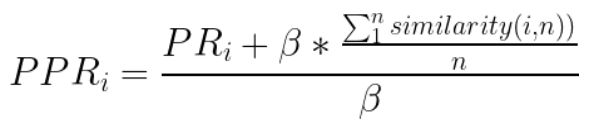

In [66]:
import igraph as ig
import numpy as np

'Calculates the personalized pageranks, based on the equation above'
def generates_personalized_pagerank():
    ## Loads iGraph file
    g = ig.Graph.Read_GraphML("graph.gra", index=0)
    ## Calculates PageRank for the graph, using iGraph's standard method
    pr = g.pagerank()
    ## Loads similarity coefficients
    avg_cos_mat = np.load("avg_cos_mat.npy")
    ## Weight factor - we will use the same weight factor as used in the Atelier Personalized PageRank, beta = 3
    ## This value can be modified to increase or decrease the importance of the average similarity of the papers
    beta = 3
    ## Calculates the new PageRanks
    ppr = []
    for i in range(len(pr)):
        ppr_i = (pr[i] + beta * avg_cos_mat[i]) / beta
        ppr.append(ppr_i)
    return ppr

'Creates ordered set of personalized pageranks - the best pagerank will be first'
'ppr = personalized pagerank list'
def order_ranks(ppr):
    ranks = np.empty([0, 2])
    for i in range(len(ppr)):
        ranks = np.vstack([ranks,[i,ppr[i]]])
    return ranks[ranks[:, 1].argsort()[::-1]]

'Prints the top PageRanks from the regular method, and from our Personalized method'
'pr = regular pagerank list'
'ppr = personalized pagerank list'
'n = top N items to get'
def gets_top_ranks(pr, ppr, n):
    top_pr = order_ranks(pr)[0:n]
    top_ppr = order_ranks(ppr)[0:n]
    print("The highest PageRanks for the Regular PageRank are:")    
    ## Adds one to the papers, because index 0 is equivalent to line 1 in the dataset/
    for i,j in top_pr:
        print("Paper {}, with PageRank {}".format(int(i+1),j))   
    print("\n")
    print("The highest PageRanks for the Personalized PageRank are:")    
    ## Adds one to the papers, because index 0 is equivalent to line 1 in the dataset/
    for i,j in top_ppr:
        print("Paper {}, with PageRank {}".format(int(i+1),j))   

gets_top_ranks(pr, ppr, 10)

The highest PageRanks for the Regular PageRank are:
Paper 20866, with PageRank 0.0019949398323845656
Paper 49760, with PageRank 0.0018904149892596516
Paper 50196, with PageRank 0.0016410131705481502
Paper 49932, with PageRank 0.0014244703063669528
Paper 49933, with PageRank 0.001405662848934266
Paper 50095, with PageRank 0.0010952413229400396
Paper 50096, with PageRank 0.0010915973731974481
Paper 20865, with PageRank 0.000753942561226734
Paper 48253, with PageRank 0.0006993949247889471
Paper 50292, with PageRank 0.000625064464484425


The highest PageRanks for the Personalized PageRank are:
Paper 35406, with PageRank 0.7281211377718421
Paper 45264, with PageRank 0.7279705322017386
Paper 45243, with PageRank 0.7276162036647819
Paper 37438, with PageRank 0.7271217069188506
Paper 3883, with PageRank 0.7246983438300684
Paper 26502, with PageRank 0.724197723752468
Paper 34881, with PageRank 0.7234532653964901
Paper 20297, with PageRank 0.7225400426620592
Paper 19114, with PageRank 0.7222921